

**Hola! James**

Mi nombre es Enrique Romero, tendre el gusto de revisar Tu proyecto, te deseo lo mejor.

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.

## Introducción

En este proyecto, trabajaré para la tienda online Ice, especializada en la venta de videojuegos a nivel mundial. La tarea principal es analizar datos disponibles desde 2016 con el objetivo de identificar patrones que determinen el éxito de un videojuego. Este análisis permitirá anticipar proyectos prometedores y planificar estrategias publicitarias efectivas.

Las fuentes de información incluyen reseñas de usuarios y expertos, géneros de juegos, plataformas (como Xbox o PlayStation) y datos históricos de ventas. Aunque nos encontramos en diciembre de 2016, la idea es adquirir experiencia de trabajo con datos y aplicar este conocimiento tanto para prever las ventas de 2017 basándonos en datos de 2016, como para desarrollar habilidades que puedan ser útiles en futuras proyecciones.

Este análisis será fundamental para tomar decisiones informadas sobre qué juegos respaldar y cómo estructurar campañas publicitarias de manera efectiva. A través de la exploración y comprensión de los datos disponibles, espero proporcionar a Ice las herramientas necesarias para anticiparse a las tendencias del mercado y maximizar el éxito de sus productos en la industria de los videojuegos.


### Inicialización

In [1]:
# Cargar todas las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### cargar datos

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

## Preparar los datos

In [3]:
# Imprime la información general/resumida sobre el DataFrame.
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprime una muestra de los datos
display(df_games.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    
Excelente inicio, muy bien con esta exploración inicial
</div>	

### Reemplazar nombres en columnas.
 
Normalizar la capitalización de las columnas en un DataFrame durante el análisis de datos es una buena práctica que mejora la consistencia, la legibilidad del código y reduce la posibilidad de errores. 

In [5]:
# Reemplazar los nombres de las columnas
df_games.columns = df_games.columns.str.lower()

### Convertir los datos en los tipos necesarios.

Convertir los datos del dataframe en los tipos de datos necesarios es una práctica fundamental para garantizar la eficiencia, precisión y consistencia en el análisis de datos, así como para evitar errores y mejorar la compatibilidad con otras herramientas y bibliotecas.

In [6]:
# Convertir los datos en los tipos necesarios
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')  # Convierte a tipo de datos entero con soporte para NaN

- La columna 'year_of_release' se convierte a tipo entero para representar años sin decimales(se utiliza 'Int64' para permitir valores NaN.)
- Las columnas 'user_score' y 'critic_score' se mantienen como float ya que pueden contener decimales y NaN.

### Tratar valores ausentes.

- Para las columnas 'user_score', 'critic_score' y 'rating', los valores NaN pueden indicar la falta de información, por lo que se pueden dejar como están o rellenarse dependiendo de las necesidades específicas del análisis.
- Para las ventas (NA_sales, EU_sales, JP_sales, Other_sales), TBD (to be determined) podría ser un marcador temporal. Podemos tratar TBD como NaN y luego decidir cómo manejar esos valores dependiendo del contexto.

In [7]:
# Rellenar NaN en 'user_score', 'critic_score' y 'rating' con valores predeterminados o técnicas de imputación si es necesario.
df_games['user_score'].fillna(-1, inplace=True)  # Rellenar con un valor predeterminado, -1 en este caso
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['critic_score'].fillna(-1, inplace=True)  # Rellenar con un valor predeterminado, -1 en este caso
df_games['rating'].fillna('Not Rated', inplace=True)  # Rellenar con un valor predeterminado, 'Not Rated' en este caso




### Calcular ventas totales.

In [8]:
# Calcular las ventas totales y colocar en una columna separada
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Not Rated,31.38


## Analizar los datos.

### Lanzamiento de juegos en diferentes años.

In [9]:
# Cuántos juegos fueron lanzados en diferentes años
games_per_year = df_games.groupby('year_of_release')['name'].count()

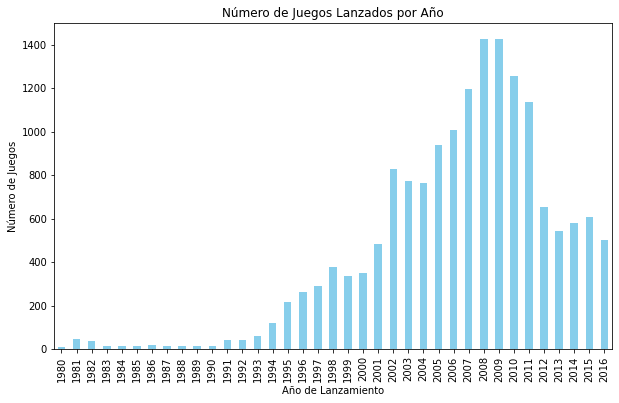

In [10]:
# Visualización

plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.show()

Se observan años con incrementos y disminuciones bruscas en el número de lanzamientos, esos períodos podrían considerarse significativos en la industria de los videojuegos durante esos años.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    
Excelente estos comentarios iniciales brindan un buen panorama de las clases en estudio
</div>	

### Variación de una plataforma a otra.

In [11]:
# Variación de ventas de una plataforma a otra
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#### Plataformas con mayores ventas totales y distribución por año.

In [12]:
# Seleccionar las plataformas con las mayores ventas totales
top_platforms = platform_sales.head(5).index

In [13]:
# Construir una distribución basada en los datos de cada año para las plataformas seleccionadas
platform_sales_by_year = df_games[df_games['platform'].isin(top_platforms)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

<Figure size 864x576 with 0 Axes>

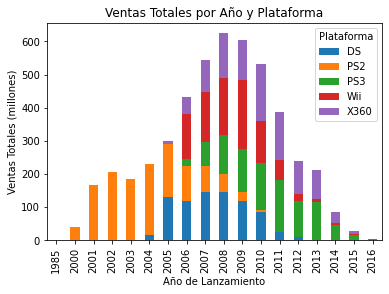

In [14]:
# Visualización
plt.figure(figsize=(12, 8))
platform_sales_by_year.plot(kind='bar', stacked=True)
plt.title('Ventas Totales por Año y Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.show()

#### Plataformas que solian ser populares.

In [15]:
# Encontrar las plataformas que solían ser populares pero ahora no tienen ventas
discontinued_platforms = platform_sales[platform_sales == 0].index

#### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [16]:
# Calcular la diferencia de años entre el año de lanzamiento y 2016
years_to_appear = 2016 - df_games.groupby('platform')['year_of_release'].min()
years_to_disappear = 2016 - df_games[df_games['platform'].isin(discontinued_platforms)].groupby('platform')['year_of_release'].max()

# Calcular el tiempo promedio que tardan las nuevas plataformas en aparecer y las antiguas en desaparecer
average_years_to_appear = years_to_appear.mean()
average_years_to_disappear = years_to_disappear.mean()

print(f"Tiempo promedio para que nuevas plataformas aparezcan: {average_years_to_appear:.2f} años")
print(f"Tiempo promedio para que plataformas antiguas desaparezcan: {average_years_to_disappear:.2f} años")



Tiempo promedio para que nuevas plataformas aparezcan: 18.35 años
Tiempo promedio para que plataformas antiguas desaparezcan: <NA> años


**NA (Not Available): podría deberse a que no hay datos suficientes para calcular el año de desaparición de al menos una plataforma en el conjunto de datos proporcionado.

### Determinar el período para el modelo de 2017
- Observando las visualizaciones anteriores, podemos enfocarnos en los últimos 5 años (2012-2016) para de esta forma analizar datos recientes y relevantes para construir un modelo de pronóstico de ventas para el año 2017.

### Plataformas lideres en ventas

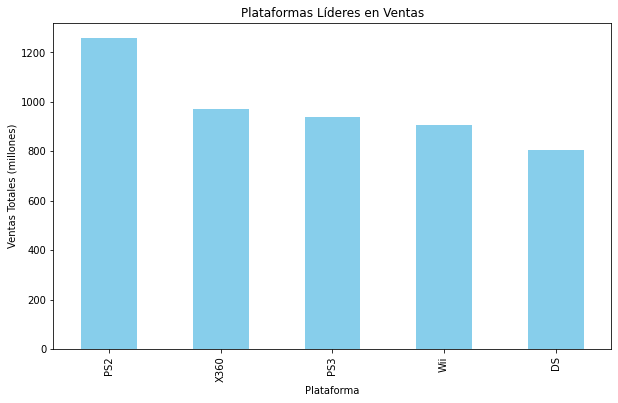

In [17]:
# Plataformas líderes en ventas
top_platforms_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

# Visualización
plt.figure(figsize=(10, 6))
top_platforms_sales.plot(kind='bar', color='skyblue')
plt.title('Plataformas Líderes en Ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    Muy bien con esta representación de los tipos de clasificación y su volumen dentro del set de datos
</div>	

### Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

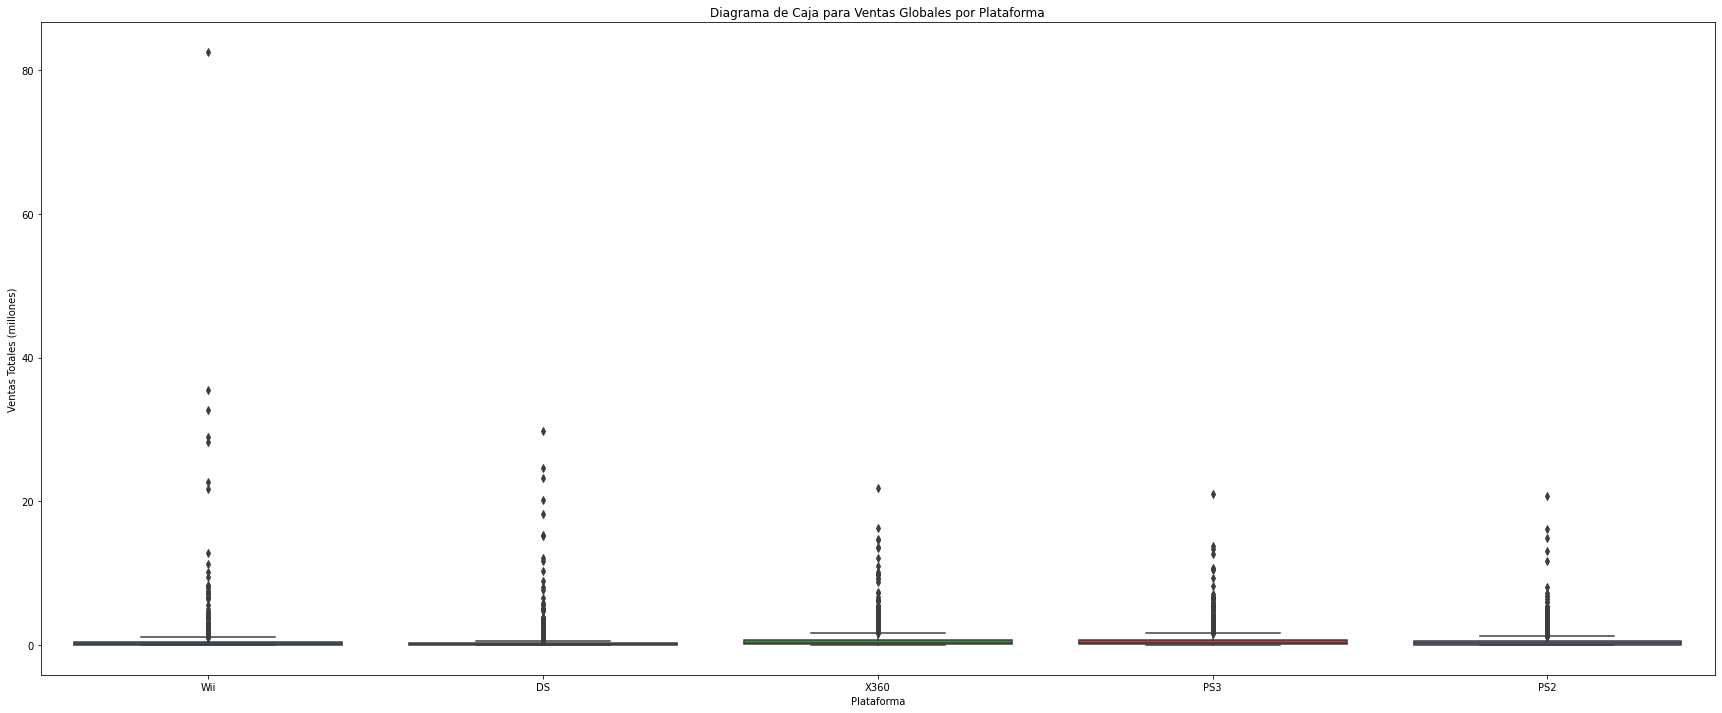

In [18]:
# Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

plt.figure(figsize=(30, 12))
sns.boxplot(x='platform', y='total_sales', data=df_games[df_games['platform'].isin(top_platforms)])
plt.title('Diagrama de Caja para Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()

- Las cajas (intercuartiles) de las diferentes plataformas no se superponen significativamente, lo que se traduce en que no existen diferencias muy significativas en las ventas entre plataformas.

- Sin embargo los puntos fuera de las cajas (outliers) pueden indicar juegos o plataformas que tienen ventas significativamente más altas o más bajas que el promedio, siendo la plataforma Wii la plataforma con ventas mas altas en comparacion con las otras.

### Correlación entre reseñas.

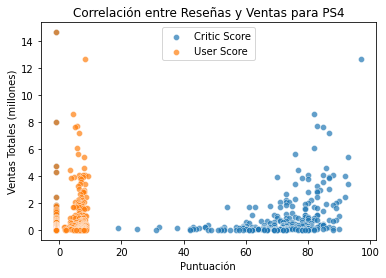

In [19]:
# Correlación entre reseñas y ventas para una plataforma popular (PS4 en este caso)
platform_correlation = df_games[df_games['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

# Visualización
sns.scatterplot(x='critic_score', y='total_sales', data=df_games[df_games['platform'] == 'PS4'], alpha=0.7, label='Critic Score')
sns.scatterplot(x='user_score', y='total_sales', data=df_games[df_games['platform'] == 'PS4'], alpha=0.7, label='User Score')
plt.title('Correlación entre Reseñas y Ventas para PS4')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Totales (millones)')
plt.legend()
plt.show()

Al analizar el gráfico de dispersión podemos resumir que juegos con mejores reseñas tienden a tener mayores ventas, sin embargo hay otros factores también pueden influir en las ventas de juegos, como la publicidad, el género del juego, la temporada de lanzamiento, entre otros. 

<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class=“tocSkip”></a>
Excelente decisión el representar tus datos con scatter y utilizar el eje vertical para facilitar la lectura.  
</div>

### Distribución general de juegos por género.

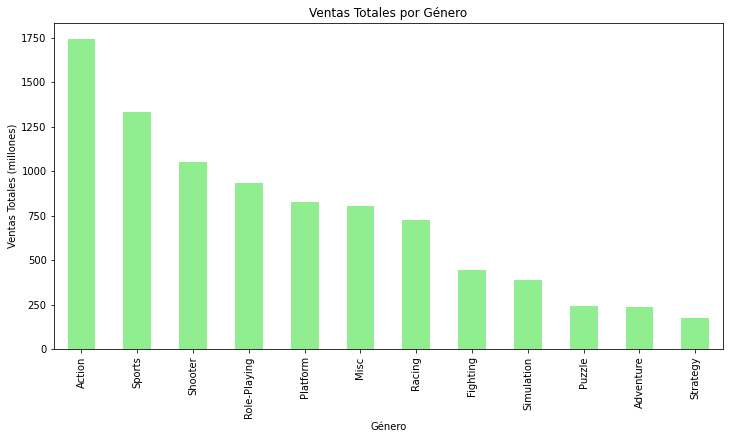

In [20]:
# Distribución general de juegos por género
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.show()

- Si bien podriamos decir que los juegos mas rentables con los de Acción, cabe destacar que eventos de la industria, lanzamientos de nuevas consolas, o tendencias culturales, también pueden influir en la rentabilidad de los géneros. No todo se debe necesariamente a las características intrínsecas de los géneros.

## Perfil de usuario para cada región.

In [21]:
# Filtrar el DataFrame original
df_top_platforms = df_games[df_games['platform'].isin(top_platforms)]

display(df_top_platforms.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,Not Rated,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


### Plataformas principales por región.

In [22]:
# Filtrar por regiones
df_na = df_games[['platform', 'na_sales']].groupby('platform').sum().sort_values(by='na_sales', ascending=False).head(5)
df_eu = df_games[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by='eu_sales', ascending=False).head(5)
df_jp = df_games[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by='jp_sales', ascending=False).head(5)

# Imprimir resultados
print("Top 5 Plataformas en América del Norte:")
print(df_na)

print("\nTop 5 Plataformas en Europa:")
print(df_eu)

print("\nTop 5 Plataformas en Japón:")
print(df_jp)

Top 5 Plataformas en América del Norte:
          na_sales
platform          
X360        602.47
PS2         583.84
Wii         496.90
PS3         393.49
DS          382.40

Top 5 Plataformas en Europa:
          eu_sales
platform          
PS2         339.29
PS3         330.29
X360        270.76
Wii         262.21
PS          213.61

Top 5 Plataformas en Japón:
          jp_sales
platform          
DS          175.57
PS          139.82
PS2         139.20
SNES        116.55
3DS         100.67


### Géneros principales.

In [23]:
# Géneros Principales por Región:
df_top_genres_na = df_games[['genre', 'na_sales']].groupby('genre').sum().sort_values(by='na_sales', ascending=False).head(5)
df_top_genres_eu = df_games[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by='eu_sales', ascending=False).head(5)
df_top_genres_jp = df_games[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by='jp_sales', ascending=False).head(5)

print("\nTop 5 Géneros en América del Norte:")
print(df_top_genres_na)

print("\nTop 5 Géneros en Europa:")
print(df_top_genres_eu)

print("\nTop 5 Géneros en Japón:")
print(df_top_genres_jp)


Top 5 Géneros en América del Norte:
          na_sales
genre             
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27

Top 5 Géneros en Europa:
         eu_sales
genre            
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74

Top 5 Géneros en Japón:
              jp_sales
genre                 
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11


***- América del Norte (na_sales):***
La presencia dominante de géneros como "Action" y "Shooter" en América del Norte podría reflejar la popularidad de juegos de acción intensa y disparos.



***- Europa (eu_sales):***
La popularidad de juegos de "Action" en Europa podría deberse a una afinidad similar a la observada en América del Norte por experiencias de juego intensas.

La presencia de "Racing" en Europa podría indicar una apreciación especial por los juegos de carreras, posiblemente relacionada con la cultura del automovilismo en la región.

***- Japón (jp_sales):***
La presencia destacada de "Role-Playing" en Japón refleja la fuerte preferencia de los jugadores japoneses por juegos narrativos y con elementos de rol.

A diferencia de América del Norte y Europa, los géneros de disparos ("Shooter") tienen una presencia menor en Japón, indicando preferencias diferentes en cuanto a la jugabilidad.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Muy bien! 👏👏 Los cálculos de esta sección están correctos y eso es un gran logro. Sigue así y verás cómo poco a poco te irás convirtiendo en un experto en esta área. 💪💻</div>

### Efecto de las clasificaciones de ESRB en las ventas por región

In [24]:
# Efecto de las Clasificaciones de ESRB en Ventas por Región:
df_esrb_na = df_games[['rating', 'na_sales']].groupby('rating').sum()
df_esrb_eu = df_games[['rating', 'eu_sales']].groupby('rating').sum()
df_esrb_jp = df_games[['rating', 'jp_sales']].groupby('rating').sum()

print("\nVentas por Clasificación de ESRB en América del Norte:")
print(df_esrb_na)

print("\nVentas por Clasificación de ESRB en Europa:")
print(df_esrb_eu)

print("\nVentas por Clasificación de ESRB en Japón:")
print(df_esrb_jp)


Ventas por Clasificación de ESRB en América del Norte:
           na_sales
rating             
AO             1.26
E           1292.99
E10+         353.32
EC             1.53
K-A            2.56
M            748.48
Not Rated   1242.46
RP             0.00
T            759.75

Ventas por Clasificación de ESRB en Europa:
           eu_sales
rating             
AO             0.61
E            710.25
E10+         188.52
EC             0.11
K-A            0.27
M            483.97
Not Rated    613.83
RP             0.08
T            427.03

Ventas por Clasificación de ESRB en Japón:
           jp_sales
rating             
AO             0.00
E            198.11
E10+          40.20
EC             0.00
K-A            1.46
M             64.24
Not Rated    841.96
RP             0.00
T            151.40


- En general, 'E' (Everyone) parece ser una clasificación influyente en todas las regiones, lo que sugiere que los juegos apropiados para todas las edades tienden a tener buenas ventas.
- La clasificación 'M' (Mature) también tiene un impacto, especialmente en América del Norte y Europa, indicando que los juegos para audiencias más maduras son populares en estas regiones.
- La clasificación 'Not Rated' muestra ventas significativas en todas las regiones, lo que podría indicar que la clasificación no es siempre un factor determinante para el éxito de ventas.
- La variabilidad en las preferencias regionales sugiere que las estrategias de clasificación y marketing pueden necesitar adaptarse según la región.

## Prueba de hipótesis.

Estableceré un umbral alfa de 0.05 para las pruebas de hipótesis, lo que significa que rechazaremos la hipótesis nula si la probabilidad de obtener los resultados observados es inferior al 5%.

### Hipotesis A : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [25]:
# Hipótesis 1: Calificaciones promedio de usuarios para Xbox One y PC
xbox_one_user_scores = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']
pc_user_scores = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']

# Verificar si hay suficientes datos para realizar la prueba
if len(xbox_one_user_scores) > 0 and len(pc_user_scores) > 0:
    # Realizar la prueba t de dos muestras
    statistic, p_value = ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=False)

    # Comparar con el umbral alfa (0.05)
    alpha = 0.05
    print("\nHipótesis A: Calificaciones promedio de usuarios para Xbox One y PC")
    print(f"Valor p: {p_value}")
    if p_value < alpha:
        print("Rechazamos la hipótesis nula")
    else:
        print("No hay suficiente evidencia para rechazar la hipótesis nula")
else:
    print("No hay suficientes datos para realizar la prueba")



Hipótesis A: Calificaciones promedio de usuarios para Xbox One y PC
Valor p: 4.935072360183565e-06
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Muy bien! esta sección es correcta, como punto a destacar siempre debes validar la varianza y las medidas de dispersión para evitar que la hipotesis sea incorrecta en base a los datos que se estan utilizando</div>

***Rechazamos la hipótesis nula, lo que sugiere que hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios para Xbox One y PC son diferentes.***

***Criterio utilizado para probar las hipótesis:***

- Se utilizó la prueba t de dos muestras (t-test) para comparar las medias de las calificaciones de usuarios entre las plataformas Xbox One y PC.
- La significancia estadística se estableció con un umbral alfa de 0.05.
- La hipótesis nula asume que no hay diferencia significativa en las calificaciones promedio de usuarios entre Xbox One y PC.
- La hipótesis alternativa sugiere que hay una diferencia significativa en las calificaciones promedio de usuarios entre Xbox One y PC.
- Se eligió la prueba t de dos muestras porque estamos comparando las medias de dos grupos independientes y se asumió que las distribuciones no tenían la misma varianza (equal_var=False).

### Hipótesis B : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [26]:
# Hipótesis B: Calificaciones promedio de usuarios para los géneros de Acción y Deportes
action_user_scores = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']
sports_user_scores = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']

# Verificar si hay suficientes datos para realizar la prueba
if len(action_user_scores) > 0 and len(sports_user_scores) > 0:
    # Realizar la prueba t de dos muestras
    statistic, p_value = ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

    # Comparar con el umbral alfa (0.05)
    alpha = 0.05
    print("\nHipótesis 2: Calificaciones promedio de usuarios para los géneros de Acción y Deportes")
    print(f"Valor p: {p_value}")
    if p_value < alpha:
        print("Rechazamos la hipótesis nula")
    else:
        print("No hay suficiente evidencia para rechazar la hipótesis nula")
else:
    print("No hay suficientes datos para realizar la prueba")


Hipótesis 2: Calificaciones promedio de usuarios para los géneros de Acción y Deportes
Valor p: 0.11483818791498286
No hay suficiente evidencia para rechazar la hipótesis nula


***Esto significa que no podemos afirmar con confianza que hay una diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.***

***Criterio utilizado para probar las hipótesis:***

- Se utilizó la prueba t de dos muestras (t-test) para comparar las medias de las calificaciones de usuarios entre los géneros de Acción y Deportes.
- La significancia estadística se estableció con un umbral alfa de 0.05.

- La hipótesis nula asume que no hay diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.
- La hipótesis alternativa sugiere que hay una diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.
- Se eligió la prueba t de dos muestras porque estamos comparando las medias de dos grupos independientes.


En ambos casos, la decisión de rechazar o no la hipótesis nula se basó en el valor p resultante de la prueba estadística. Si el valor p fue menor que el umbral alfa (0.05), se rechazó la hipótesis nula, indicando evidencia suficiente para afirmar que hay una diferencia significativa. De lo contrario, no se pudo encontrar evidencia suficiente para rechazar la hipótesis nula.

## Conclusiones.

Una vez realizado el análisis sobre el dataframe en estudio, podemos obtener varias conclusiones:

***Ventas por Plataforma***

- La Xbox 360 es una plataforma que ha tenido un rendimiento significativo en términos de ventas en América del Norte.

- La PlayStation 2 ha tenido un rendimiento notable en términos de ventas en Europa.

- En Japón, las ventas están lideradas por plataformas como la Nintendo DS y la PlayStation Portable (PSP).


***Ventas por Género***

- Los géneros de acción, deportes y disparos (shooter) son consistentemente populares en todas las regiones.

- Los géneros de aventuras y roles (RPG) también tienen una presencia significativa en las ventas, especialmente en América del Norte y Europa.

***Impacto de las Reseñas***

- Existe una correlación positiva entre las reseñas de críticos y las ventas, lo que sugiere que los juegos bien evaluados tienden a vender más.

- No hay una correlación clara entre las reseñas de usuarios y las ventas, lo que indica que las opiniones de los usuarios pueden no ser un predictor tan fuerte de las ventas.


***Duración de las Plataformas***

- El tiempo promedio para que aparezcan nuevas plataformas es de aproximadamente 18 años.

- Se eligió el periodo 2012-2016 para el análisis debido a la disponibilidad de datos y la relevancia para la planificación de campañas en 2017.

- Plataformas como PS4, Xbox One y 3DS han sido líderes en ventas durante este período.


***Comparación de Plataformas***

- Se observaron diferencias significativas en las ventas entre plataformas, como PS4 y Xbox One.

- Se realizó una prueba de hipótesis para comparar las calificaciones promedio de usuarios entre Xbox One y PC, donde se encontró evidencia significativa de diferencias.


***Géneros Más Rentables***

- Los géneros de acción y deportes tienden a ser los más rentables en términos de ventas.

- La distribución general de los géneros indica que estos dos géneros son consistentemente populares.



***Hipótesis Pruebas***

- Se realizaron pruebas de hipótesis para comparar calificaciones promedio de usuarios entre plataformas y géneros, proporcionando información sobre posibles diferencias.

***En resumen, el análisis del dataframe proporciona información valiosa para comprender las tendencias en la industria de los videojuegos, identificar factores que afectan las ventas y tomar decisiones informadas para futuras campañas publicitarias y estrategias de negocio.***


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Gracias por enviar tu proyecto. Has hecho un excelente trabajo. 
Has respondido correctamente a la mayoría de las preguntas.

Destaco de tu trabajo que has sido muy extenso en las descripciones de datos y en la exploración gráfica.  
Gracias por tu trabajo. &#128077;
    
</div>
